In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [25]:
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [26]:
ride_summary_data = pd.merge(ride_data, city_data, how='left', on='city')

In [27]:
#ride_summary_data.head()

In [28]:
# Urban x_axis
urban_rideCounts_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Urban'].groupby('city').count()['ride_id'])
# Urban y_axis
urban_avgFare_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Urban'].groupby('city').mean()['fare'])
# Urban driver count
urban_driverCount_byCity = ride_summary_data[ride_summary_data['type']=='Urban'][['city','driver_count']].drop_duplicates().set_index('city')

urban_summary = pd.merge(pd.merge(urban_rideCounts_byCity,urban_avgFare_byCity, on='city'),urban_driverCount_byCity, on='city').sort_values('ride_id')
urban_summary = urban_summary.rename(columns={'ride_id': 'ride_counts',
                                             'fare': 'avg_fare'})

#urban_summary

In [29]:
# Suburban x_axis
sub_rideCounts_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Suburban'].groupby('city').count()['ride_id'])
# Suburban y_axis
sub_avgFare_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Suburban'].groupby('city').mean()['fare'])
# Suburban driver count
sub_driverCount_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Suburban'][['city','driver_count']].drop_duplicates().set_index('city'))

suburban_summary = pd.merge(pd.merge(sub_rideCounts_byCity, sub_avgFare_byCity, on='city'), sub_driverCount_byCity, on='city').sort_values('ride_id')
suburban_summary = suburban_summary.rename(columns={'ride_id': 'ride_counts',
                                             'fare': 'avg_fare'})


In [30]:
# Rural x_axis
rural_rideCounts_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Rural'].groupby('city').count()['ride_id'])
# Rural y_axis
rural_avgFare_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Rural'].groupby('city').mean()['fare'])
# Rural driver count
rural_driverCount_byCity = pd.DataFrame(ride_summary_data[ride_summary_data['type']=='Rural'][['city','driver_count']].drop_duplicates().set_index('city'))

rural_summary = pd.merge(pd.merge(rural_rideCounts_byCity, rural_avgFare_byCity, on='city'), rural_driverCount_byCity, on='city').sort_values('ride_id')
rural_summary = rural_summary.rename(columns={'ride_id': 'ride_counts',
                                             'fare': 'avg_fare'})

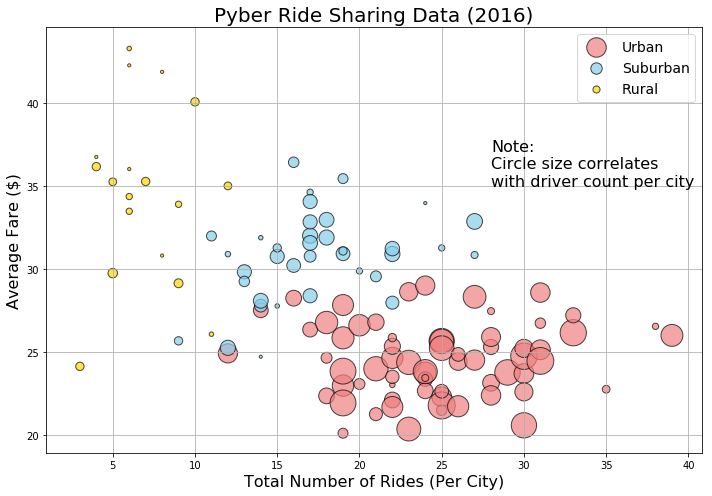

In [31]:
plt.figure(figsize=(10,7))
plt.title("Pyber Ride Sharing Data (2016)", fontsize = 20)

plt.scatter(urban_summary['ride_counts'], 
            urban_summary['avg_fare'], marker='o', 
            facecolors='lightcoral', edgecolors='black', 
            s=urban_summary['driver_count']*10, 
            alpha = 0.7, 
            label="Urban")
plt.scatter(suburban_summary['ride_counts'], 
            suburban_summary['avg_fare'], 
            marker = 'o', facecolors='skyblue', 
            edgecolors='black', 
            s=suburban_summary['driver_count']*10, 
            alpha = 0.7, 
            label="Suburban")
plt.scatter(rural_summary['ride_counts'], 
            rural_summary['avg_fare'], 
            marker = 'o', facecolors='gold', 
            edgecolors='black', 
            s=rural_summary['driver_count']*10, 
            alpha = 0.7, 
            label="Rural")

plt.xlabel("Total Number of Rides (Per City)", fontsize=16)
plt.ylabel("Average Fare ($)", fontsize=16)
plt.text(28,35, "Note:\nCircle size correlates \nwith driver count per city", fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('charts/PyberSharing_Data.png')
plt.show()

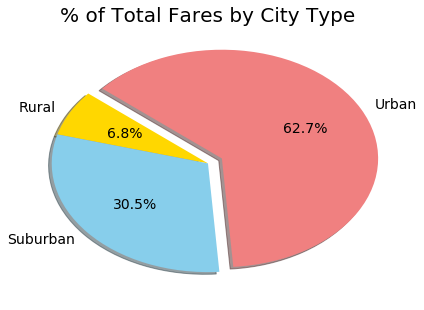

In [32]:
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0, 0, 0.1)
autopct = "%1.1f%%"

total_fare_byType = ride_summary_data.groupby('type').sum()['fare']

labels = total_fare_byType.axes[0].tolist()

plt.figure(figsize=(7,5))
plt.title("% of Total Fares by City Type", fontsize=20)
plt.pie(total_fare_byType, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct=autopct, 
        shadow=True, 
        startangle=140, 
        textprops={'fontsize': 14})
plt.savefig("charts/Percent_TotalFares_by_city_type.png")
plt.show()

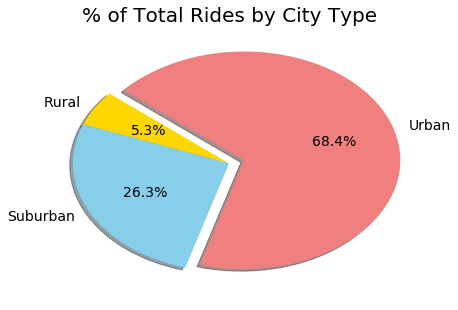

In [33]:
total_rides_byType = ride_summary_data.groupby('type').count()['ride_id']

labels = total_rides_byType.axes[0].tolist()

plt.figure(figsize=(7,5))
plt.title("% of Total Rides by City Type", fontsize=20)
plt.pie(total_rides_byType, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct=autopct, 
        shadow=True, 
        startangle=140, 
        textprops={'fontsize': 14})

plt.savefig("charts/Percent_TotalRides_by_city_type.png")
plt.show()

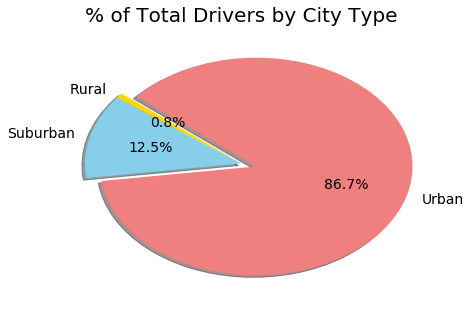

In [34]:
total_drivers_byType = ride_summary_data.groupby('type').sum()['driver_count']

labels = total_drivers_byType.axes[0].tolist()

plt.figure(figsize=(7,5))
plt.title("% of Total Drivers by City Type", fontsize=20)
plt.pie(total_drivers_byType, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct=autopct, 
        shadow=True, 
        startangle=140, 
        textprops={'fontsize': 14})

plt.savefig("charts/Percent_TotalDrivers_by_city_type.png")
plt.show()